In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt


In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

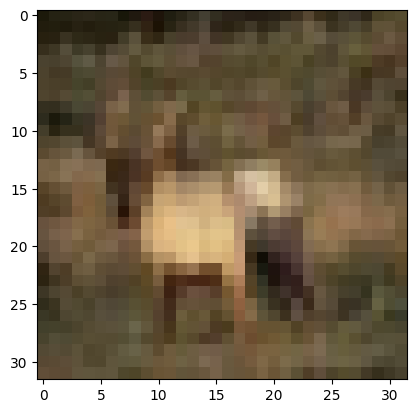

In [7]:
plt.imshow(X_train[3])


In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
class_names[2]

'bird'

In [15]:
def plot_sample(index, X, y):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(class_names[y[index]])




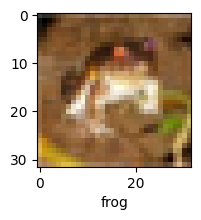

In [16]:
plot_sample(0, X_train, y_train)

In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# **Data** **Augmentation**

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the generator on the training data
datagen.fit(X_train)


# CNN Model

In [21]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [25]:
if datagen:
    history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                        epochs=20,
                        validation_data=(X_test, y_test))
else:
    history = model.fit(X_train, y_train, epochs=20,
                        validation_data=(X_test, y_test),
                        batch_size=64)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 129ms/step - accuracy: 0.2352 - loss: 2.0145 - val_accuracy: 0.4496 - val_loss: 1.4770
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 126ms/step - accuracy: 0.4087 - loss: 1.6129 - val_accuracy: 0.5091 - val_loss: 1.3402
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 126ms/step - accuracy: 0.4612 - loss: 1.4867 - val_accuracy: 0.5111 - val_loss: 1.3836
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 127ms/step - accuracy: 0.4904 - loss: 1.4153 - val_accuracy: 0.5834 - val_loss: 1.1510
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 129ms/step - accuracy: 0.5169 - loss: 1.3626 - val_accuracy: 0.5718 - val_loss: 1.2266
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 126ms/step - accuracy: 0.5366 - loss: 1.3087 - val_accuracy: 0.6273 - val_loss: 1.0610
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 127ms/step - accuracy: 0.5548 - loss: 1.2547 - val_accuracy: 0.6332 - val_loss: 1.0286
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 125ms/step - accuracy: 0.5717 - loss: 1.2196 -

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')


313/313 - 3s - 11ms/step - accuracy: 0.6994 - loss: 0.8889
Test accuracy: 0.6994


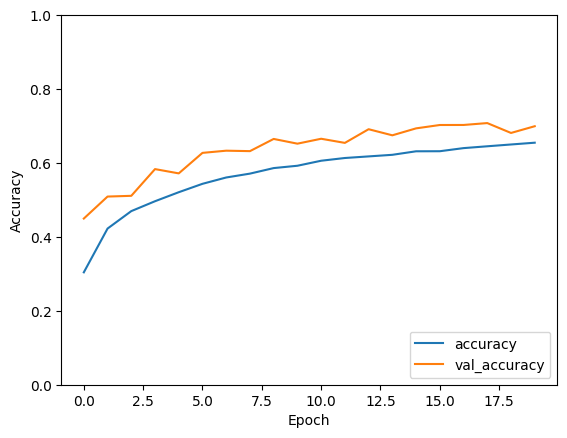

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [29]:
single_image = X_test[0:1]

single_prediction = model.predict(single_image)
predicted_class = np.argmax(single_prediction)

print(f'Predicted class: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Predicted class: 3


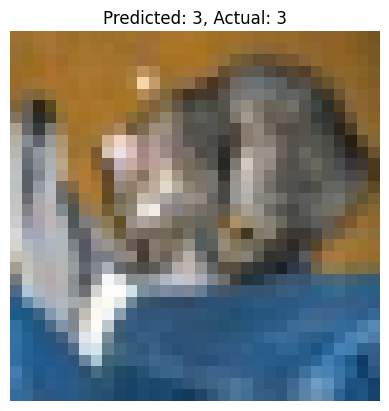

In [30]:
plt.imshow(X_test[0])
plt.title(f'Predicted: {predicted_class}, Actual: {y_test[0][0]}')
plt.axis('off')
plt.show()
